**How to forecast sales with Python using SARIMA model**

Referencia: Raphael Bubolz Larrosa; Jul 15, 2019.

Link:https://towardsdatascience.com/how-to-forecast-sales-with-python-using-sarima-model-ba600992fa7d

Vamos a utilizar un conjunto de datos de las ventas de automóviles que se pueden descargar desde : 

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'
df = pd.read_excel("Retail2.xlsx")

Este paso es solo para importar las bibliotecas, como numpy, pandas, matplotlib y statsmodels, que es la biblioteca que contiene el modelo SARIMA y otras características estadísticas. Esta parte del código se utiliza para configurar los gráficos de matplotlib. El conjunto de datos y el código originales son un poco complejos, pero para que todo sea más fácil, el archivo disponible para descargar solo tiene una fecha y columnas de venta para evitar el procesamiento previo de los datos.

In [ ]:
y = df.set_index(['Date'])
y.head(5)

,Car sales
Date,
2015-06-01,67
2015-07-01,68
2015-08-01,66
2015-09-01,86
2015-10-01,84


El comando set_index establece la fecha de la columna como un índice y el cabezal está imprimiendo las primeras 5 filas del conjunto de datos.

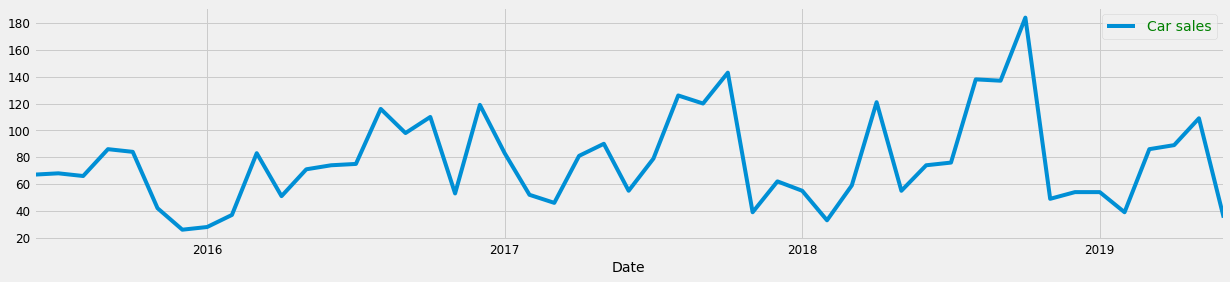

In [ ]:
y.plot(figsize=(19, 4))
plt.show()


Analizando el gráfico, podemos observar que la serie temporal tiene patrón de estacionalidad. Octubre tiene un pico de ventas, al menos durante los últimos 3 años. También hay una tendencia al alza a lo largo de los años.

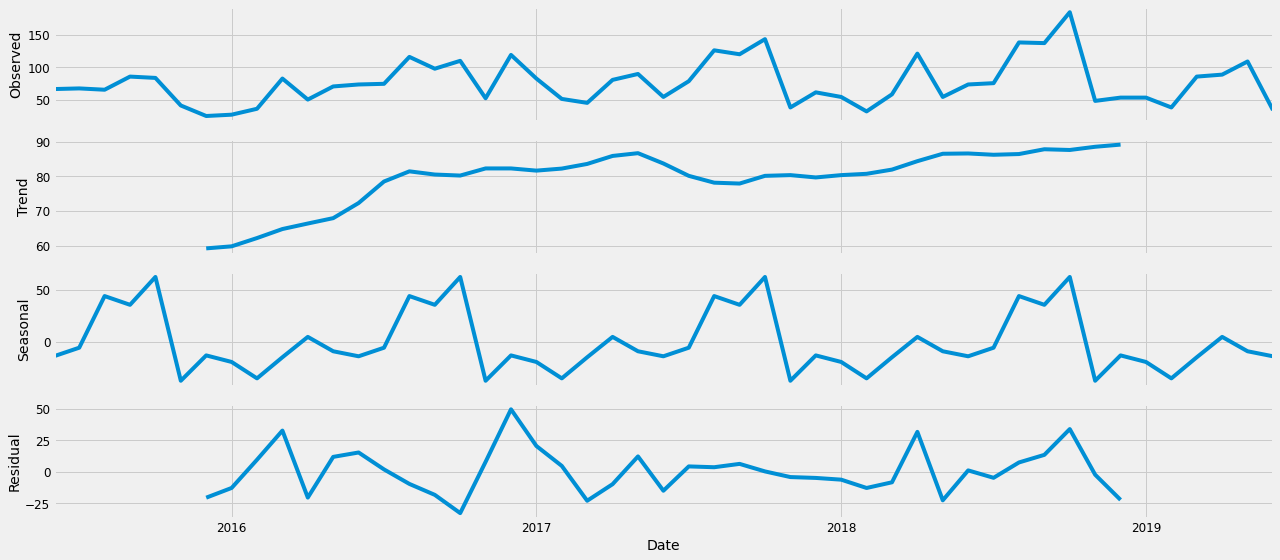

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Usando el comando "sm.tsa.seasonal_decompose" de la biblioteca pylab podemos descomponer la serie de tiempo en tres componentes distintos: tendencia, estacionalidad y ruido.

**MODELO SARIMA PARA EL PRONOSTICO DE LA SERIE TEMPORAL**

Usemos SARIMA. La notación de los modelos es SARIMA (p, d, q). (P, D, Q) m. Estos tres parámetros tienen en cuenta la estacionalidad, la tendencia y el ruido en los datos.

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:564.3056398203263
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:410.5215377862637
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:353.36692989696155
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:363.03322198787765
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:348.1373105289627
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:237.2069523573001
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:524.3873658732059
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:384.7486382180309
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:345.9523219946667
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:994.4119465780597
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:364.83311727217733
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:341.5095766512995
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:239.1352556669856
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:223.43134436185053
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:483.6919410483037
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1296.984995927383
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - A


Según Peterson, T. (2014) el AIC (criterio de información de Akaike) es un estimador de la calidad relativa de los modelos estadísticos para un conjunto de datos dado. Dada una colección de modelos para los datos, AIC estima la calidad de cada modelo, en relación con cada uno de los otros modelos. Cuanto menor sea el valor de AIC, mejor. Nuestro resultado sugiere que SARIMAX (0, 0, 1) x (1, 1, 1, 12) con un valor de AIC de 223.43 es la mejor combinación, por lo que debemos considerar que esta es la opción óptima.

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,order=(0, 0, 1),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2084      0.282     -0.739      0.460      -0.761       0.344
ar.S.L12      -0.3157      0.184     -1.720      0.085      -0.675       0.044
ma.S.L12       0.3337      0.439      0.760      0.447      -0.527       1.194
sigma2       650.7902    264.392      2.461      0.014     132.592    1168.989



en el comando “mod = sm.tsa.statespace.SARIMAX” necesitamos configurar la combinación elegida.

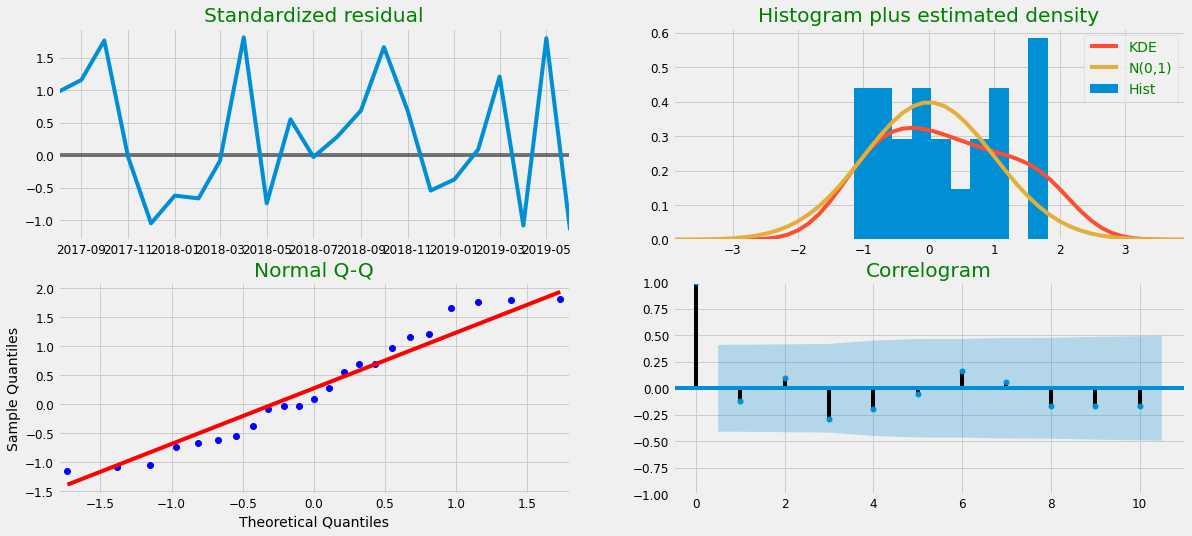

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

Con el diagnóstico anterior podemos visualizar información importante como la distribución y la función de Auto correlación ACF (correlograma). Los valores hacia arriba del "0" tienen alguna correlación con los datos de la serie temporal. Los valores cercanos a "1" demuestran la correlación más fuerte.

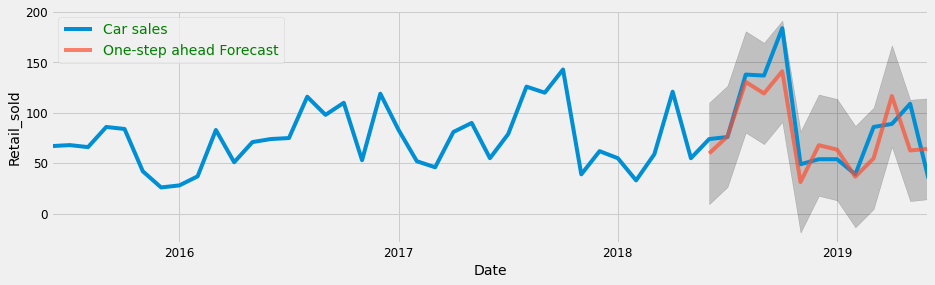

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2018-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

Este paso consiste en comparar los valores reales con las predicciones del pronóstico. Nuestras previsiones encajan muy bien con los valores reales. El comando “pred = results.get_prediction (start = pd.to_datetime ('2018–06–01')” determina el período que pronosticaría al comparar con los datos verdaderos.

In [ ]:
y_forecasted = pred.predicted_mean
y_forecasted_v=y_forecasted.to_frame(name='Car sales')
y_truth = y['2018-06-01':]
mse = ((y_forecasted_v - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))
print(y_forecasted)
print(y_truth)

The Mean Squared Error is Car sales    595.97
dtype: float64
The Root Mean Squared Error is Car sales    24.41
dtype: float64
2018-06-01     59.727702
2018-07-01     76.652537
2018-08-01    130.655063
2018-09-01    119.265115
2018-10-01    141.234876
2018-11-01     31.356323
2018-12-01     67.898651
2019-01-01     63.491013
2019-02-01     36.668665
2019-03-01     54.852340
2019-04-01    116.709311
2019-05-01     62.698820
2019-06-01     64.399689
Freq: MS, dtype: float64
            Car sales
Date                 
2018-06-01         74
2018-07-01         76
2018-08-01        138
2018-09-01        137
2018-10-01        184
2018-11-01         49
2018-12-01         54
2019-01-01         54
2019-02-01         39
2019-03-01         86
2019-04-01         89
2019-05-01        109
2019-06-01         35


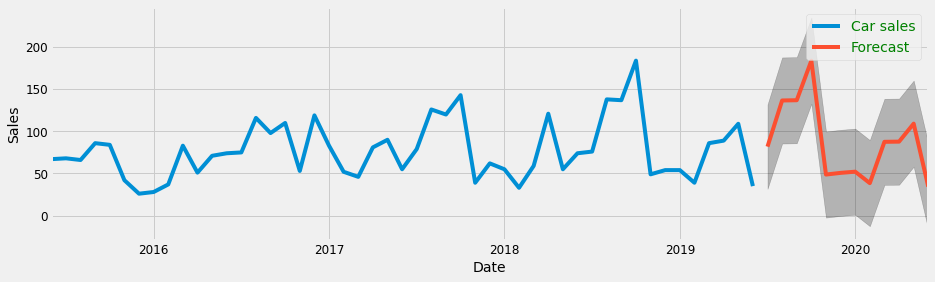

In [ ]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()


Aquí pronosticamos las ventas para los próximos 12 meses. Este parámetro se puede modificar en la línea “pred_uc = results.get_forecast (steps = 12)” del código.

In [ ]:
y_forecasted = pred.predicted_mean
y_forecasted.head(13)

2018-06-01     59.727702
2018-07-01     76.652537
2018-08-01    130.655063
2018-09-01    119.265115
2018-10-01    141.234876
2018-11-01     31.356323
2018-12-01     67.898651
2019-01-01     63.491013
2019-02-01     36.668665
2019-03-01     54.852340
2019-04-01    116.709311
2019-05-01     62.698820
2019-06-01     64.399689
Freq: MS, dtype: float64